# 03 Nov 2022 - Signal Processing

One of the major activities in physics and astronomy that consumes much of our working hours is processing signals. Like we discussed, most instruments and tools give us a $V(t)$ over some finite perioid of time. How do we extract information from the signal and make conclusions about that results? One of the most useful tools for extracting information from time series data (data where there's some temporal aspect to it) is the Fast Fourier Transform (FFT). We introduced it a bit last class, but this time we will systematically investigate its usage and what we try to interpret from the results. We will also do some filtering and signal recovery (inverse FFT).

The specifics of how an FFT works and how it is different from a Fourier Series analysis is important. We will touch on this after you have more experience with what it does. 

[Notes: Intro to the FFT](https://github.com/dannycab/phy415msu/blob/main/MMIPbook/assets/pdfs/notes/Notes_3_Introduction_to_FFT.pdf)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
import scipy.signal as sig
%matplotlib inline

## Starting the FFT

We will do the first FFT in the code below for a single frequency sinusoidal function. In this example, we know what the FFT should produce (a single peak at the given $w_A$).

$V(t) = A\sin(\omega_At) = A\sin(2\pi f_A t)$

Here we program the precisely known longest period $T_0 = \frac{1}{f_A}$.

(0.0, 300.0, -0.1, 1.1)

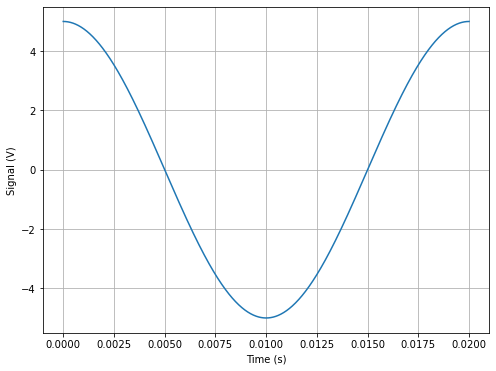

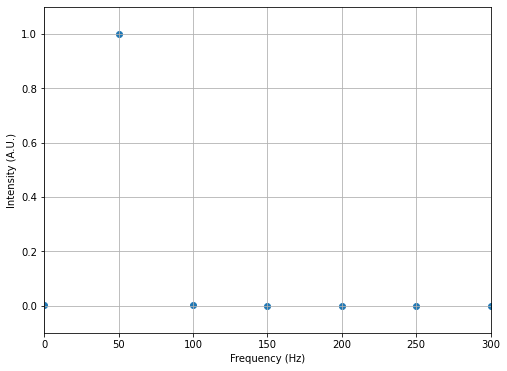

In [2]:
## Parameters and setup
A = 5
fA = 50

T0 = 1/fA
N = 1000
dt = T0/N

## Create time series data (t and V)
t = np.linspace(0,T0,N)
V = A*np.cos(2*np.pi*fA*t)

## Plot signal
fig1 = plt.figure(figsize=(8,6))
plt.plot(t,V, label='Signal')
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Signal (V)')

## Perform FFT and store the result (notice the normalization!)
Vf = (2/(N*A))*fft(V)
freq = fftfreq(N,dt)

fig2 = plt.figure(figsize=(8,6))
## Plottting the results and zooming in (notice we are plotting only positive frequencies)
plt.scatter(freq[0:N//2], np.abs(Vf[0:N//2]), label='FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Intensity (A.U.)')
plt.grid()
plt.axis([0,300,-0.1,1.1])

### Questions

Here's some investigations to perform with the code above:

1. Change the frequency and amplitudes. Do things change?
2. Change $T_0$ to be some integer value of the current period (e.g., 2$T_0$). What happens?
3. Change $T_0$ to be some non-integer value of the current period (e.g., 3.5$T_0$). What happens?
4. Add more data points. Does anything change?
5. What happens if you mess up the normalization `2/(N*A))*fft(V)`? How can we determine this is the correct normalization?
6. Add a phase to the signal. What happens to the FFT?
7. Add a DC offset (a constant value). What happens to the FFT?

## Multi-Frequency signal

Let's unpack what happens when there's multiple frequencies in the signal. Consider some linear combination that looks like:

$$V(t) = \sum_{i=1}^{N} A_n\sin(n \omega_0 t) = \sum_{i=1}^{N} A_n \sin( 2 n \pi f_0 t)$$

Let's see what the FFT looks like.


(0.0, 300.0, -0.1, 1.1)

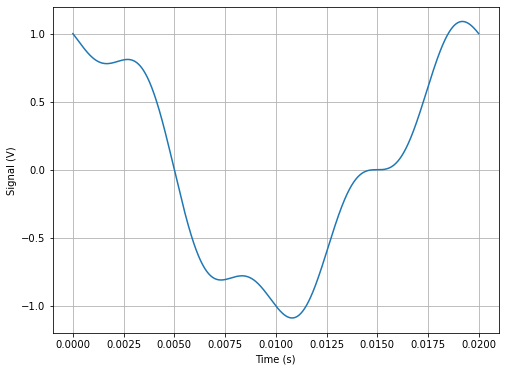

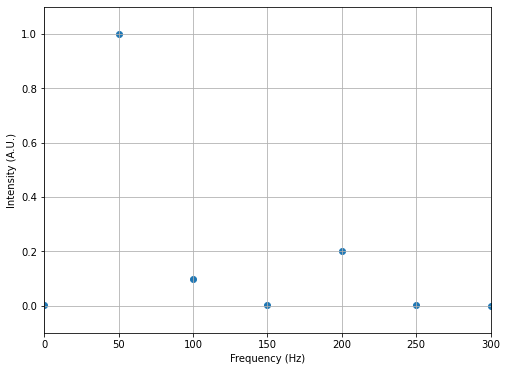

In [3]:
A = 1
B = 0.1
C = -0.2

fA = 50
fB = 100
fC = 200

T0 = 1/fA
N = 1000
dt = T0/N

t = np.linspace(0,T0,N)
V = A*np.cos(2*np.pi*fA*t)+B*np.sin(2*np.pi*fB*t)+C*np.sin(2*np.pi*fC*t)

## Plot signal
fig1 = plt.figure(figsize=(8,6))
plt.plot(t,V, label='Signal')
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Signal (V)')

## Perform FFT and store the result (notice the normalization!)
Vf = (2/(N*A))*fft(V)
freq = fftfreq(N,dt)

fig2 = plt.figure(figsize=(8,6))
## Plottting the results and zooming in (notice we are plotting only positive frequencies)
plt.scatter(freq[0:N//2], np.abs(Vf[0:N//2]), label='FFT')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Intensity (A.U.)')
plt.axis([0,300,-0.1,1.1])


### Questions

Here's some investigations to perform with the code above:

1. Change the frequency and amplitudes. How do things change?
2. Change $T_0$ to be some integer value of the current period (e.g., 2$T_0$). What happens?
3. Change $T_0$ to be some non-integer value of the current period (e.g., 3.5$T_0$). What happens?
4. Add more data points. Does anything change?
5. What happens if you mess up the normalization `2/(N*A))*fft(V)`? How can we determine this is the correct normalization?
6. Add a phase to the signal. What happens to the FFT?
    1. Do this for each one and then together. Does anything change?
7. Add a DC offset (a constant value). What happens to the FFT?

## Noise

Let's add some noise to our signal. We never get anything clean from our instruments, sometimes we don't get a damn thing. But electronic noise, pickup noise, instrument noise, and other sources plague our search for a clear data set. Let's look at noise itself first. SciPy offers us a whole library of random things. Let's just use Gaussian noise.

Gaussian noise is drawn from a random Gaussian distribution. You have two parameters with this kind of noise: $\mu$ and $\sigma$. These are where the center of Gaussian is located ($\mu$) and how spread out it is $\sigma$. The spread is in units of standard deviation, so $\sigma = 1$ is a lot of noise. Below we use "zero centered" noise, $\mu=0$ and plot it. We perform an FFT to see what we get.

(0.0, 300.0, -0.1, 1.1)

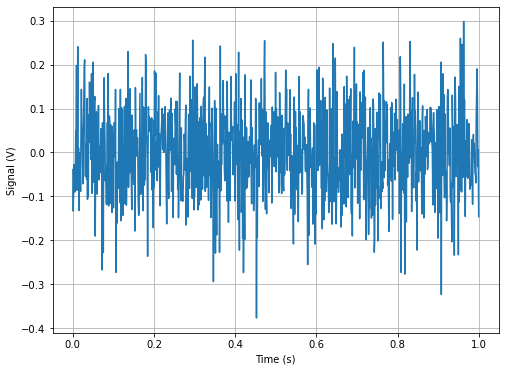

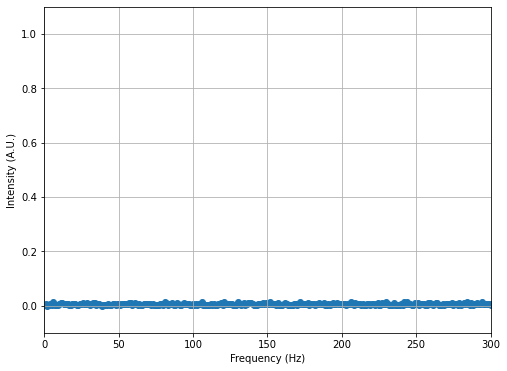

In [4]:
T0 = 1
N = 1000
dt = T0/N

## Zero centered noise
mu = 0
sigma = 0.1

t = np.linspace(0,T0,N)
V = np.random.normal(mu,sigma,len(t))

## Plot signal
fig1 = plt.figure(figsize=(8,6))
plt.plot(t,V, label='Signal')
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Signal (V)')

## Perform FFT and store the result (notice the normalization!)
Vf = (2/(N*A))*fft(V)
freq = fftfreq(N,dt)

fig2 = plt.figure(figsize=(8,6))
## Plottting the results and zooming in (notice we are plotting only positive frequencies)
plt.scatter(freq[0:N//2], np.abs(Vf[0:N//2]), label='FFT')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Intensity (A.U.)')
plt.axis([0,300,-0.1,1.1])


### Questions

Here's some investigations to perform with the code above:

1. Change the $\mu$ and $sigma$. How do things change?
2. Change $T_0$ to be some integer value of the current period (e.g., 2$T_0$). What happens?
3. Change $T_0$ to be some non-integer value of the current period (e.g., 3.5$T_0$). What happens?
4. Add more data points. Does anything change?
5. What happens if you mess up the normalization `2/(N*A))*fft(V)`? How can we determine this is the correct normalization?
6. Overall, what do you notice about the FFT of noise?

## Add noise to your single frequency signal

Ok, now you looked a single frequencies, multiple frequencies (albeit integer values), and noise.  

1. Create a single frequency signal and add noise to it. 
2. Perform the FFT.
3. Investigate it systematically. How does the noise affect the FFT? Can we think about removing the noise? Can you come uo with a scheme to do so?

In [5]:
## your code here

## Add noise to your multi-frequency signal


1. Create a multi-frequency signal (integer $w_0$) and add noise to it. 
2. Perform the FFT.
3. Investigate it systematically. How does the noise affect the FFT? Can we think about removing the noise? Can you come uo with a scheme to do so?

In [6]:
## your code here

## Any signal + noise

1. Create a signal  of your choosing (not sinusoial) and add noise to it (later is fine). 
2. Perform the FFT.
3. Investigate it systematically. How does the noise affect the FFT? Can we think about removing the noise? Can you come uo with a scheme to do so?

In [7]:
## your code here